# DOCES: Example Explained

We start this example with the import of DOCES and auxiliary libraries.

In [1]:
import doces
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Before the initialization of DOCES, we create a random network with the help of Igraph.

In [2]:
vertex_count = 300
k = 8
p = k/vertex_count
g_in = ig.Graph()
g_in = g_in.Erdos_Renyi(vertex_count, p)
g_in = g_in.components(mode=ig.WEAK).giant()
g_in = g_in.simplify()
vertex_count = g_in.vcount()

Next, it is necessary to set up the agent-based simulation by instantiating an object with the `Opinion_dynamics()` constructor.

In [3]:
# Initializes the network parameters
edges = g_in.get_edgelist()
directed = False
# Creates a DOCES object.
od = doces.Opinion_dynamics( 
    vertex_count, 
    edges,
    directed)

Loading the edge list with 1178 edges:
Progress: [=====               ]  30%

Initialize and visualize agent opinions.

Progress: [====================] 100%
Creating the inverted Adj. list.
Progress: [====================] 100%

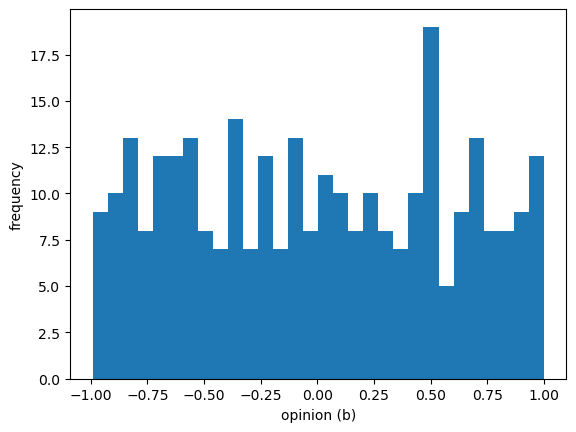

In [4]:
b = np.random.random(size=vertex_count)
b = b * 2 - 1 # From -1 to 1

plt.hist(b, bins=30)
plt.xlabel('opinion (b)')
plt.ylabel('frequency')
plt.show()

Once the od object is initialized, the simulation can be performed by calling its method `simulate_dynamics()` as:

In [5]:
# Initializes the dynamics parameters
number_of_iterations = 100000
phi = 1.473
mu = 1.
posting_filter = doces.UNIFORM
receiving_filter = doces.STRETCHED_HALF_COSINE 
feed_size = 5
rewire = True

# Run the dynamics
output_dictionary = od.simulate_dynamics(
    number_of_iterations,
    phi,
    mu, 
    posting_filter, 
    receiving_filter,
    b = b,
    feed_size = feed_size,
    rewire = rewire
)


Network summary:
Directed: False 
Vertices: 300
Setting b values.
Creating the post list.
Creating feeds.
Randomly populate feeds.
Initializing receiving filter types.
Initializing posting filter types.
Dynamics symmary:
b array has been loaded.
number_of_iterations: 100000
min_opinion: -1.000000
max_opinion: 1.000000
phi: 1.473000
mu: 1.000000
delta: 0.100000
posting_filter: UNIFORM
receiving_filter: STRETCHED_HALF_COSINE
Dynamics with rewiring
feed_size: 5
Executing the dynamics.
Progress: [====================] 100%

Getting the final opinions:

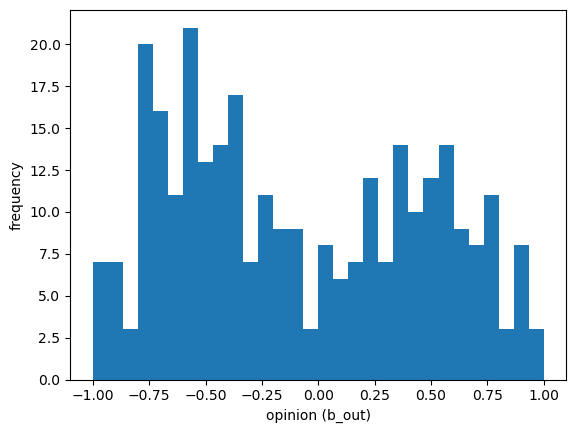

In [6]:
b_out = output_dictionary["b"]
plt.hist(b_out, bins=30)
plt.xlabel('opinion (b_out)')
plt.ylabel('frequency')
plt.show()

## Visualize input and output networks

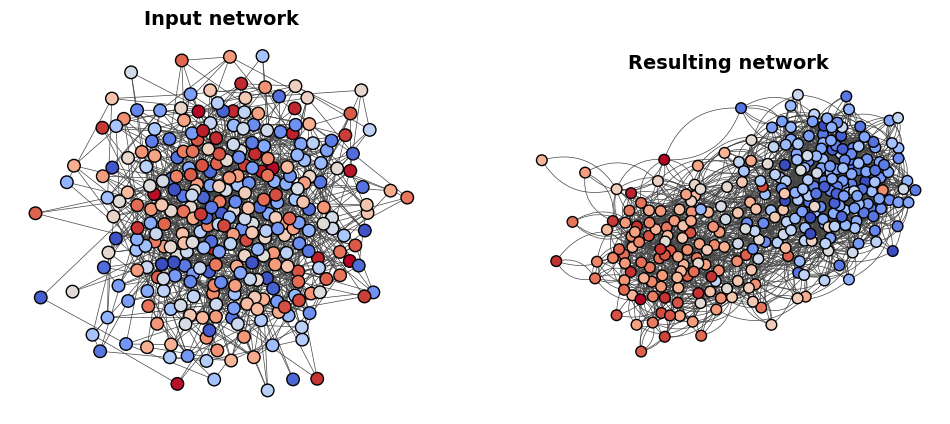

In [7]:
edge_list = output_dictionary["edges"]
g_out = ig.Graph(edges=edge_list, directed=False)

# Create a figure
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Set the colors of the input network 
norm = plt.Normalize(vmin=-1, vmax=1)  # Normalize between -1 and 1
colors = [cm.coolwarm(norm(value)) for value in b]  # Convert to RGB
hex_colors = [f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}' for r, g, b, _ in colors] # Convert RGB to hex
g_in.vs["color"] = hex_colors

# Set the colors of the output network 
colors = [cm.coolwarm(norm(value)) for value in b_out]  # Convert to RGB
hex_colors = [f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}' for r, g, b, _ in colors] # Convert RGB to hex
g_out.vs["color"] = hex_colors

# Layout and plot (input network)
layout = g_in.layout_fruchterman_reingold()
ig.plot(g_in, layout=layout, vertex_size=0.5, edge_width=0.5, target=ax[0])
ax[0].set_title("Input network", fontsize=14, fontweight="bold")

# Layout and plot (output network)
layout = g_out.layout_fruchterman_reingold()
ig.plot(g_out, layout=layout, vertex_size=0.5, edge_width=0.5, target=ax[1])
ax[1].set_title("Resulting network", fontsize=14, fontweight="bold")

plt.show()
